<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/%EF%BC%93Dspline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ３次元の点列にスムージングスプラインを適用するプログラム例

Geminiに作成してもらった

# 理論

3次元空間中の点列を平滑化して空間曲線を推定する方法は、1次元の平滑化スプラインの考え方を拡張することで実現できます。以下にその方法と、関連する微分幾何的な説明を加えます。

## 3次元空間曲線への平滑化スプラインの適用

1次元の平滑化スプラインでは、与えられたデータ点 $(x_i, y_i)$ に対して、データの適合度と関数の滑らかさ（通常は2階微分の2乗積分）のバランスを取るような関数 $f(x)$ を見つけます。これを3次元に拡張する場合、曲線はパラメータ $t$ を用いて $C(t) = (x(t), y(t), z(t))$ と表現されます。

### 1. 推定する曲線と目的関数

与えられた3次元の点列を $P_1, P_2, \ldots, P_n$ とし、各点 $P_i = (x_i, y_i, z_i)$ に対応するパラメータ値を $t_i$ とします。推定したい3次元曲線 $C(t) = (X(t), Y(t), Z(t))$ は、次の目的関数 $S$ を最小化するように決定されます。

$$S = \sum_{i=1}^{n} ||P_i - C(t_i)||^2 + \lambda \int ||C''(t)||^2 dt$$

ここで、
* 第1項 $\sum_{i=1}^{n} ||P_i - C(t_i)||^2 = \sum_{i=1}^{n} [(x_i - X(t_i))^2 + (y_i - Y(t_i))^2 + (z_i - Z(t_i))^2]$ は、データ点と推定された曲線上の対応する点との間の距離の2乗和で、**データへの適合度**を示します。
* 第2項 $\lambda \int ||C''(t)||^2 dt = \lambda \int \left( (X''(t))^2 + (Y''(t))^2 + (Z''(t))^2 \right) dt$ は、曲線の**滑らかさ**を表す罰則項です。$C''(t) = (X''(t), Y''(t), Z''(t))$ は曲線の加速度ベクトルであり、$||C''(t)||^2$ はその大きさの2乗です。
* $\lambda \ge 0$ は**平滑化パラメータ**で、データへの適合度と曲線の滑らかさの間のトレードオフを調整します。$\lambda=0$ の場合は補間スプラインとなり、$\lambda \to \infty$ の場合は直線（多項式回帰の場合は高次の影響が消える）に近づきます。

### 2. 推定手順

1.  **点列のパラメータ化**:
    まず、与えられた点列 $P_1, \ldots, P_n$ に対応するパラメータ値 $t_1, \ldots, t_n$ を割り当てる必要があります。一般的な方法としては、**累積弦長 (cumulative chord length)** を用います。
    $t_1 = 0$
    $t_k = t_{k-1} + ||P_k - P_{k-1}|| \quad (k=2, \ldots, n)$
    これらの $t_k$ 値は、しばしば区間 $[0, 1]$ に正規化されます。

2.  **基底関数の選択**:
    各座標成分 $X(t), Y(t), Z(t)$ を、Bスプラインなどの基底関数の線形結合として表現します。例えば、$X(t) = \sum_{j} c_{xj} B_j(t; \mathbf{k})$ のように書けます。ここで、$B_j(t; \mathbf{k})$ はノットベクトル $\mathbf{k}$ を持つBスプライン基底関数、$c_{xj}$ は制御点（または係数）です。$Y(t), Z(t)$ も同様です。

3.  **最小化問題の求解**:
    目的関数 $S$ を制御点 $\{c_{xj}\}, \{c_{yj}\}, \{c_{zj}\}$ に関して最小化します。これは通常、大規模な線形方程式系を解く問題に帰着します。

---

## 微分幾何的な説明 🧐

3次元空間内の曲線 $C(t)$ の性質を記述するために、微分幾何学の概念が役立ちます。

* **接線ベクトル (Tangent vector)**: $C'(t) = (X'(t), Y'(t), Z'(t))$ は曲線上の点における接線方向を示します。その単位ベクトルは $T(t) = C'(t) / ||C'(t)||$ です。
* **弧長 (Arc length)**: $s(t) = \int_{t_0}^t ||C'(\tau)|| d\tau$ は、基準点からの曲線に沿った長さです。曲線を弧長 $s$ でパラメータ化すると、$||C'(s)||=1$ となり、多くの計算が単純化されます。
* **曲率 (Curvature)**: $\kappa(t) = \frac{||C'(t) \times C''(t)||}{||C'(t)||^3}$ は、曲線がどれだけ曲がっているかを示します。弧長パラメータ $s$ を用いると、$\kappa(s) = ||C''(s)||$ となります（$C'(s)$が単位ベクトルなので、$C''(s)$は法線ベクトル方向を向き、その大きさが曲率となる）。
* **主法線ベクトル (Principal normal vector)**: $N(t) = T'(t) / ||T'(t)||$ （ただし $T'(t) \neq \mathbf{0}$ の場合）。曲線が曲がっている方向を指します。弧長パラメータでは $N(s) = C''(s)/\kappa(s)$。
* **従法線ベクトル (Binormal vector)**: $B(t) = T(t) \times N(t)$。$T(t)$ と $N(t)$ の両方に直交します。
* **捩率 (Torsion)**: $\tau(t)$ は、曲線がどれだけ平面からねじれているかを示します。

### 罰則項の微分幾何的意味

罰則項 $\int ||C''(t)||^2 dt$ は、曲線の「曲がりエネルギー」または「総加速度の2乗」と解釈できます。

* **弧長パラメータ $s$ の場合**:
    もし曲線が弧長パラメータ $s$ で表されているなら、$C''(s)$ は加速度ベクトルであり、$||C''(s)||^2 = (\kappa(s))^2$ となります（速度ベクトル $C'(s)$ の大きさは1で一定なので、接線方向の加速度成分は0）。この場合、罰則項は $\int \kappa(s)^2 ds$ となり、**曲率の2乗積分**を最小化することになります。これは、曲線をできるだけ「まっすぐ」に、つまり曲がりが少ない状態にしようとする効果があります。

* **一般のパラメータ $t$ の場合**:
    パラメータ $t$ が弧長でない一般の場合、$C''(t)$ は接線方向の加速度成分と法線方向の加速度成分の両方を持つことができます。
    $C''(t) = \frac{d||C'(t)||}{dt} T(t) + \kappa(t) ||C'(t)||^2 N(t)$
    したがって、
    $||C''(t)||^2 = \left(\frac{d||C'(t)||}{dt}\right)^2 + (\kappa(t) ||C'(t)||^2)^2$
    この場合、$\int ||C''(t)||^2 dt$ を最小化することは、
    1.  曲率 $\kappa(t)$ を小さく保つ。
    2.  パラメータ化の速度 $v(t) = ||C'(t)||$ の変化率 $\frac{dv(t)}{dt}$ を小さく保つ。
    という2つの効果があります。後者は、曲線上の点の分布が急激に変わる（パラメータ $t$ の変化に対して曲線上の点の進む速さが急に変わる）ことを抑制する効果があります。

このように、3次元平滑化スプラインは、データ点に近づけつつ、微分幾何学的な観点から滑らかな曲線を推定する強力な手法です。

---

## 補足事項

* **平滑化パラメータ $\lambda$ の選択**: $\lambda$ の値は、推定される曲線の滑らかさに大きく影響します。交差検証 (cross-validation) などの統計的手法を用いて、データに基づいて適切な $\lambda$ を選択することが一般的です。
* **パラメータ化の影響**: 点列のパラメータ化の方法は、最終的な曲線の形状に影響を与える可能性があります。累積弦長は一般的で直感的な方法ですが、他のパラメータ化（例：centripetal parameterization）がより良い結果をもたらす場合もあります。
* **高階微分**: 罰則項として、より高階の微分（例：$\int ||C'''(t)||^2 dt$）を用いることも理論的には可能ですが、通常は2階微分で十分な滑らかさが得られます。

この方法を用いることで、ノイズを含む3次元の点群データから、滑らかで妥当な空間曲線を推定することができます。

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 人工的な3次元点列データの生成
#    ノイズを含む螺旋状のデータを生成します。

# パラメータ
num_points = 50  # データ点の数
noise_level = 0.2  # ノイズの大きさ
t_true = np.linspace(0, 4 * np.pi, num_points) # パラメータ

# 真の曲線 (螺旋)
x_true = np.cos(t_true)
y_true = np.sin(t_true)
z_true = t_true / 2

# ノイズを加えたデータ点
noise = np.random.normal(scale=noise_level, size=(num_points, 3))
points = np.vstack((x_true, y_true, z_true)).T + noise
x_data, y_data, z_data = points[:,0], points[:,1], points[:,2]



In [2]:
# 2. 平滑化スプラインの適用
#    scipy.interpolate.splprep を使用します。
#    `s` は平滑化因子です。s=0 で補間、sが大きいほど滑らかになります。
#    点の数 m に対して、s の適切な値は m - sqrt(2*m) から m + sqrt(2*m) の範囲などとされますが、
#    試行錯誤で調整することが多いです。

# 平滑化パラメータ (この値を変更して結果を比較してみてください)
smoothing_factor = 5.0  # 例: num_points * noise_level**2 程度を目安に調整

# splprepは[x,y,z]のリストまたはタプルを期待します
# tck は (knots, coefficients, degree) を含むタプル
# u は各データ点に対応するパラメータ値 (0から1に正規化されることが多い)
tck, u = interpolate.splprep([x_data, y_data, z_data], s=smoothing_factor)

# 推定されたパラメータ u の範囲で新しい点を評価して滑らかな曲線を生成
num_eval_points = 200
u_eval = np.linspace(u.min(), u.max(), num_eval_points)
x_smooth, y_smooth, z_smooth = interpolate.splev(u_eval, tck)


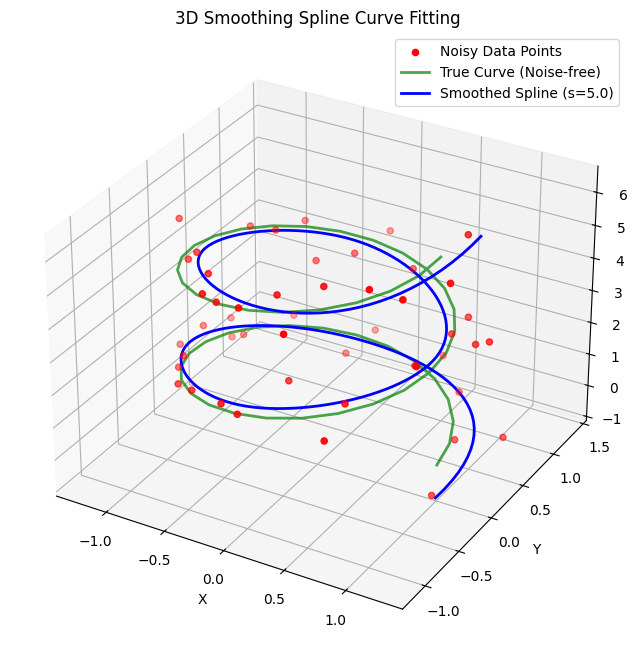

Sum of squared residuals: 4.9998570397299735
Smoothing factor s: 5.0


In [3]:
# 3. 結果の可視化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 元のデータ点 (ノイズあり)
ax.scatter(x_data, y_data, z_data, c='r', marker='o', label='Noisy Data Points')

# 真の曲線 (ノイズなし、比較用)
ax.plot(x_true, y_true, z_true, 'g-', label='True Curve (Noise-free)', linewidth=2, alpha=0.7)

# 平滑化された曲線
ax.plot(x_smooth, y_smooth, z_smooth, 'b-', label=f'Smoothed Spline (s={smoothing_factor})', linewidth=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Smoothing Spline Curve Fitting')
ax.legend()
plt.show()

# 平滑化パラメータ s と誤差の関係について
# splprep の s は sum((w[i] * (y[i]-g(x[i])))**2, axis=0) <= s という条件に関連します。
# ここで g(x[i]) がスプラインによる推定値です。
# 残差平方和を確認してみましょう。
fitted_points = np.array(interpolate.splev(u, tck)).T # 元のパラメータuに対応するスプライン上の点
residuals_sq_sum = np.sum((points - fitted_points)**2)
print(f"Sum of squared residuals: {residuals_sq_sum}")
print(f"Smoothing factor s: {smoothing_factor}")
if residuals_sq_sum > smoothing_factor and len(points) > tck[2]+1 : # tck[2] is degree k, #knots = len(tck[0]), #coeffs = len(tck[1][0])
    print("Note: The sum of squared residuals is greater than s.")
    print("This might happen if splprep cannot satisfy the condition s exactly,")
    print("for example, if s is too small for the given data and spline degree.")
    print("Or, if the number of data points is not much larger than the spline degree.")